In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
data = pd.read_csv('Spotify_Youtube.csv', index_col=0)
data.columns

Index(['Artist', 'Url_spotify', 'Track', 'Album', 'Album_type', 'Uri',
       'Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness',
       'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo',
       'Duration_ms', 'Url_youtube', 'Title', 'Channel', 'Views', 'Likes',
       'Comments', 'Description', 'Licensed', 'official_video', 'Stream'],
      dtype='object')

In [44]:
data.describe()

,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Comments,Stream
count,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,2.071600e+04,2.024800e+04,2.017700e+04,2.014900e+04,2.014200e+04
mean,0.619777,0.635250,5.300348,-7.671680,0.096456,0.291535,0.055962,0.193521,0.529853,120.638340,2.247176e+05,9.393782e+07,6.633411e+05,2.751899e+04,1.359422e+08
std,0.165272,0.214147,3.576449,4.632749,0.111960,0.286299,0.193262,0.168531,0.245441,29.579018,1.247905e+05,2.746443e+08,1.789324e+06,1.932347e+05,2.441321e+08
min,0.000000,0.000020,0.000000,-46.251000,0.000000,0.000001,0.000000,0.014500,0.000000,0.000000,3.098500e+04,0.000000e+00,0.000000e+00,0.000000e+00,6.574000e+03
25%,0.518000,0.507000,2.000000,-8.858000,0.035700,0.045200,0.000000,0.094100,0.339000,97.002000,1.800095e+05,1.826002e+06,2.158100e+04,5.090000e+02,1.767486e+07
50%,0.637000,0.666000,5.000000,-6.536000,0.050500,0.193000,0.000002,0.125000,0.537000,119.965000,2.132845e+05,1.450110e+07,1.244810e+05,3.277000e+03,4.968298e+07
75%,0.740250,0.798000,8.000000,-4.931000,0.103000,0.477250,0.000463,0.237000,0.726250,139.935000,2.524430e+05,7.039975e+07,5.221480e+05,1.436000e+04,1.383581e+08
max,0.975000,1.000000,11.000000,0.920000,0.964000,0.996000,1.000000,1.000000,0.993000,243.372000,4.676058e+06,8.079649e+09,5.078865e+07,1.608314e+07,3.386520e+09


In [45]:
data.select_dtypes(include=['object']).describe().T

,count,unique,top,freq
Artist,20718,2079,Gorillaz,10
Url_spotify,20718,2079,https://open.spotify.com/artist/3AA28KZvwAUcZu...,10
Track,20718,17841,El Ultimo Adiós - Varios Artistas Version,24
Album,20718,11937,Greatest Hits,30
Album_type,20718,3,album,14926
Uri,20718,18862,spotify:track:0tzixmHNQfE6S6SirSToxW,24
Url_youtube,20248,18154,https://www.youtube.com/watch?v=GqOvxbFLwjY,18
Title,20248,18146,Color Esperanza 2020 - Various Artists (Offici...,18
Channel,20248,6714,T-Series,238
Description,19842,17395,,114


In [46]:
data.select_dtypes(exclude=['object']).columns

Index(['Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness',
       'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo',
       'Duration_ms', 'Views', 'Likes', 'Comments', 'Stream'],
      dtype='object')

In [47]:
top_10_percent_threshold = data['Stream'].quantile(0.9)
top_songs = data[data['Stream'] >= top_10_percent_threshold]
len(top_songs)

2015

In [48]:
correlation_matrix = top_songs[['Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo', 'Duration_ms', 'Stream']].corr()
correlation_matrix
#looks like loudness (pos), accousticness (neg), and instrumentalness (neg) have the highest correlation with streams
#although none of these are super significant

,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Stream
Danceability,1.000000,0.071901,0.027575,0.220539,0.225265,-0.143589,-0.154251,-0.092509,0.379910,-0.136340,-0.167797,0.031920
Energy,0.071901,1.000000,0.035977,0.695844,0.055858,-0.586593,-0.108457,0.148248,0.385693,0.106272,0.029057,-0.041136
Key,0.027575,0.035977,1.000000,0.009536,0.032365,-0.026189,0.020978,0.004342,0.034005,-0.028408,0.015980,-0.004030
Loudness,0.220539,0.695844,0.009536,1.000000,0.088027,-0.423209,-0.263432,0.078301,0.248207,0.080570,-0.062918,0.066010
Speechiness,0.225265,0.055858,0.032365,0.088027,1.000000,-0.066916,-0.056013,0.007626,0.039145,0.135142,-0.053541,-0.017690
Acousticness,-0.143589,-0.586593,-0.026189,-0.423209,-0.066916,1.000000,0.106124,-0.092189,-0.158271,-0.074883,-0.075031,0.028433
Instrumentalness,-0.154251,-0.108457,0.020978,-0.263432,-0.056013,0.106124,1.000000,-0.000588,-0.104168,-0.043109,-0.021500,-0.045836
Liveness,-0.092509,0.148248,0.004342,0.078301,0.007626,-0.092189,-0.000588,1.000000,0.017470,0.023725,-0.016900,-0.017689
Valence,0.379910,0.385693,0.034005,0.248207,0.039145,-0.158271,-0.104168,0.017470,1.000000,0.021647,-0.085422,-0.021774
Tempo,-0.136340,0.106272,-0.028408,0.080570,0.135142,-0.074883,-0.043109,0.023725,0.021647,1.000000,0.027366,-0.027360


/Users/nicoleclaerhout/Documents/OS410/.venv/lib/python3.9/site-packages/seaborn/axisgrid.py:1886: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(self.x, **orient_kw_x, **kwargs)
/Users/nicoleclaerhout/Documents/OS410/.venv/lib/python3.9/site-packages/seaborn/axisgrid.py:1892: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe57

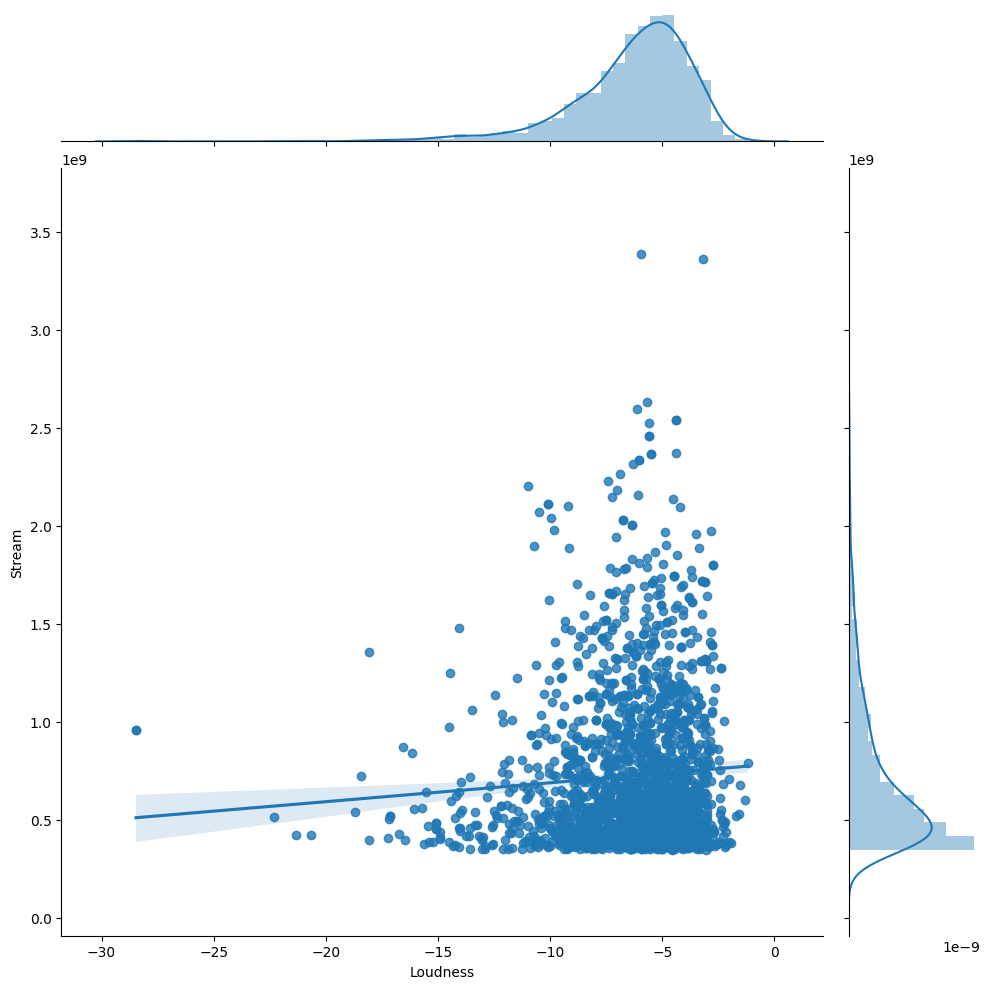

In [49]:
sns.JointGrid(data=top_songs, y='Stream', x='Loudness', height=10).plot(sns.regplot, sns.distplot)

In [50]:
sns.JointGrid(data=top_songs, y='Stream', x='Tempo', height=10).plot(sns.regplot, sns.distplot)


/Users/nicoleclaerhout/Documents/OS410/.venv/lib/python3.9/site-packages/seaborn/axisgrid.py:1886: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(self.x, **orient_kw_x, **kwargs)
/Users/nicoleclaerhout/Documents/OS410/.venv/lib/python3.9/site-packages/seaborn/axisgrid.py:1892: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe57

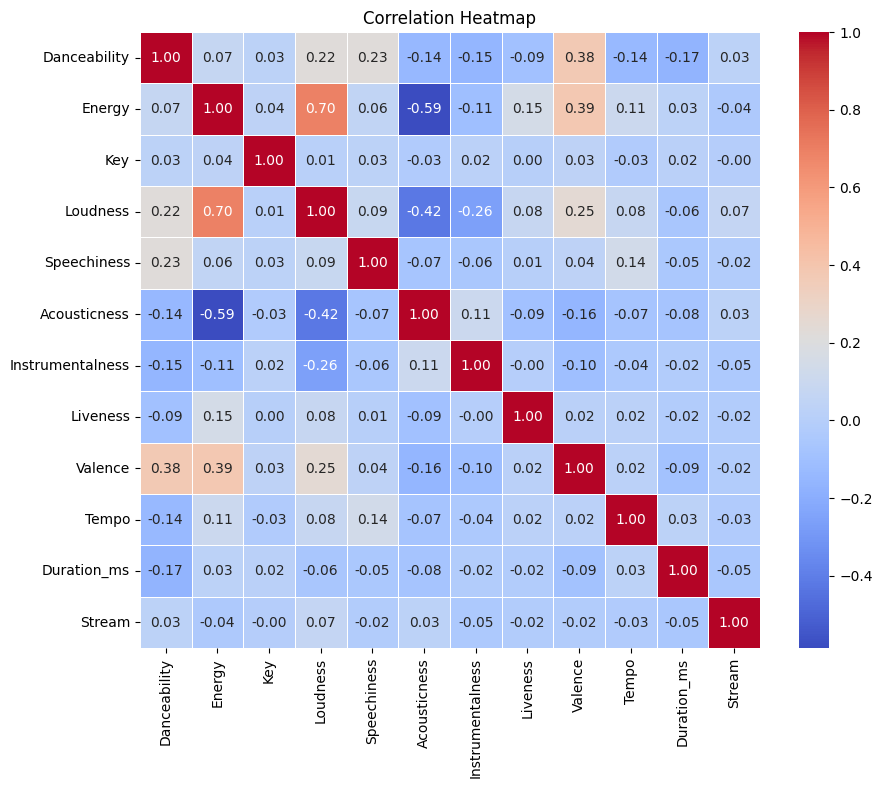

In [ ]:
plt.figure(figsize=(10, 8), facecolor='w')
#creating a heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
correlation_matrix['Stream'].sort_values(ascending=False)

Stream              1.000000
Loudness            0.066010
Danceability        0.031920
Acousticness        0.028433
Key                -0.004030
Liveness           -0.017689
Speechiness        -0.017690
Valence            -0.021774
Tempo              -0.027360
Energy             -0.041136
Instrumentalness   -0.045836
Duration_ms        -0.054660
Name: Stream, dtype: float64

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [ ]:
model = smf.ols('Stream ~ Energy + Loudness', data=top_songs)
model.fit().summary()
#after playing around, only energy and loudness seem to be signfiicant
#R-squared is 0.019, which is not very good -> the model does not explain much of the variance in the data.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Stream   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     19.54
Date:                Sat, 18 Nov 2023   Prob (F-statistic):           3.93e-09
Time:                        11:08:38   Log-Likelihood:                -42749.
No. Observations:                2015   AIC:                         8.550e+04
Df Residuals:                    2012   BIC:                         8.552e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.148e+09   6.99e+07     16.420      0.000    1.01e+09    1.29e+09
Energy     -3.853e+08   7.02e+07     -5.490      0.000   -5.23e+08   -2.48e+08
Loudness    2.681e+07   4.49e+06      5.968      0.000     1.8e+07    3.56e+07
==============================================================================
Omnibus:                      745.226   Durbin-Watson:                   1.469
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2705.339
Skew:                           1.827   Prob(JB):                         0.00
Kurtosis:                       7.344   Cond. No.                         77.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
!pip install scikit-learn

  Using cached scikit_learn-1.3.2-cp39-cp39-macosx_10_9_x86_64.whl.metadata (11 kB)
  Using cached joblib-1.3.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.2.0-py3-none-any.whl.metadata (10.0 kB)
Using cached scikit_learn-1.3.2-cp39-cp39-macosx_10_9_x86_64.whl (10.2 MB)
Using cached joblib-1.3.2-py3-none-any.whl (302 kB)
Using cached threadpoolctl-3.2.0-py3-none-any.whl (15 kB)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
#adding column indicating whether the song represented is in the top 10% of streams
data['top_10_percent'] = data['Stream'] >= top_10_percent_threshold

In [ ]:
data.isnull().sum()

Artist                0
Url_spotify           0
Track                 0
Album                 0
Album_type            0
Uri                   0
Danceability          2
Energy                2
Key                   2
Loudness              2
Speechiness           2
Acousticness          2
Instrumentalness      2
Liveness              2
Valence               2
Tempo                 2
Duration_ms           2
Url_youtube         470
Title               470
Channel             470
Views               470
Likes               541
Comments            569
Description         876
Licensed            470
official_video      470
Stream              576
top_10_percent        0
dtype: int64

In [ ]:
#dropping columns that are unnessary for this purpose -> only looking at audio features of the songs as it relates to number of streams
data = data.select_dtypes(exclude=['object'])
data = data.drop(['Views', 'Duration_ms', 'Likes', 'Comments'], axis=1)
data.columns

Index(['Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness',
       'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo',
       'Stream', 'top_10_percent'],
      dtype='object')

In [ ]:
data.isnull().sum()

Danceability          2
Energy                2
Key                   2
Loudness              2
Speechiness           2
Acousticness          2
Instrumentalness      2
Liveness              2
Valence               2
Tempo                 2
Stream              576
top_10_percent        0
dtype: int64

In [ ]:
#dropping the 2 rows that have null values for energy because these are teh same 2 rows that have null values for all of the other audio features
data.dropna(subset=['Energy'],inplace=True)

In [ ]:
data.isnull().sum()

Danceability          0
Energy                0
Key                   0
Loudness              0
Speechiness           0
Acousticness          0
Instrumentalness      0
Liveness              0
Valence               0
Tempo                 0
Stream              576
top_10_percent        0
dtype: int64

In [ ]:
data['Stream'].mean()

135942989.91717973

In [ ]:
#the mean for streams is extreme so using median
data['Stream'].fillna(data['Danceability'].median(), inplace=True)


In [ ]:
len(data)

20716

In [ ]:
X = data.drop(['Stream', 'top_10_percent'], axis=1)
y = data['Stream']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# using a Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# extracting feature importances
feature_importances = rf_model.feature_importances_

# create a DataFrame to display each feature importance
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
feature_importance_df

,Feature,Importance
3,Loudness,0.138774
9,Tempo,0.114288
5,Acousticness,0.113453
8,Valence,0.110750
1,Energy,0.108371
4,Speechiness,0.105099
0,Danceability,0.102460
7,Liveness,0.096604
6,Instrumentalness,0.057711
2,Key,0.052489


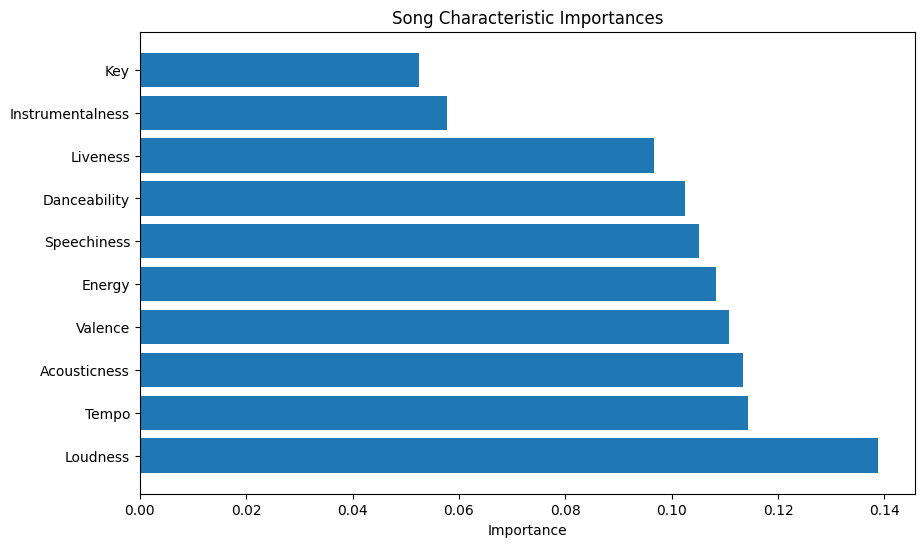

In [ ]:
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Song Characteristic Importances')
plt.show()

In [ ]:
top_average_levels = data[data.top_10_percent==True].drop(columns = ['Stream', 'top_10_percent'], axis=1).mean()
bottom_average_levels = data[data.top_10_percent==False].drop(columns = ['Stream', 'top_10_percent'], axis=1).mean()

In [ ]:
top_avg_df = top_average_levels.reset_index().rename({'index': 'Feature', 0: 'Average Value for the Top 10%'}, axis=1)
top_avg_df

,Feature,Average Value for the Top 10%
0,Danceability,0.654848
1,Energy,0.661409
2,Key,5.217866
3,Loudness,-6.352386
4,Speechiness,0.092940
5,Acousticness,0.204281
6,Instrumentalness,0.013655
7,Liveness,0.174024
8,Valence,0.521417
9,Tempo,120.365539


In [ ]:
bottom_avg_df = bottom_average_levels.reset_index().rename({'index': 'Feature', 0: 'Average Value for the Bottom 90%'}, axis=1)
bottom_avg_df


,Feature,Average Value for the Bottom 90%
0,Danceability,0.615999
1,Energy,0.632432
2,Key,5.309235
3,Loudness,-7.813832
4,Speechiness,0.096835
5,Acousticness,0.300937
6,Instrumentalness,0.060520
7,Liveness,0.195622
8,Valence,0.530762
9,Tempo,120.667734


In [ ]:
avg_df = pd.merge(top_avg_df, bottom_avg_df, on='Feature')
avg_df

,Feature,Average Value for the Top 10%,Average Value for the Bottom 90%
0,Danceability,0.654848,0.615999
1,Energy,0.661409,0.632432
2,Key,5.217866,5.309235
3,Loudness,-6.352386,-7.813832
4,Speechiness,0.092940,0.096835
5,Acousticness,0.204281,0.300937
6,Instrumentalness,0.013655,0.060520
7,Liveness,0.174024,0.195622
8,Valence,0.521417,0.530762
9,Tempo,120.365539,120.667734


In [ ]:
avg_df['Difference'] = avg_df['Average Value for the Top 10%'] - avg_df['Average Value for the Bottom 90%']
avg_df.sort_values(by='Difference')

,Feature,Average Value for the Top 10%,Average Value for the Bottom 90%,Difference
9,Tempo,120.365539,120.667734,-0.302195
5,Acousticness,0.204281,0.300937,-0.096656
2,Key,5.217866,5.309235,-0.091369
6,Instrumentalness,0.013655,0.060520,-0.046865
7,Liveness,0.174024,0.195622,-0.021597
8,Valence,0.521417,0.530762,-0.009345
4,Speechiness,0.092940,0.096835,-0.003895
1,Energy,0.661409,0.632432,0.028977
0,Danceability,0.654848,0.615999,0.038849
3,Loudness,-6.352386,-7.813832,1.461446


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Danceability'),
  Text(1, 0, 'Energy'),
  Text(2, 0, 'Key'),
  Text(3, 0, 'Loudness'),
  Text(4, 0, 'Speechiness'),
  Text(5, 0, 'Acousticness'),
  Text(6, 0, 'Instrumentalness'),
  Text(7, 0, 'Liveness'),
  Text(8, 0, 'Valence'),
  Text(9, 0, 'Tempo')])

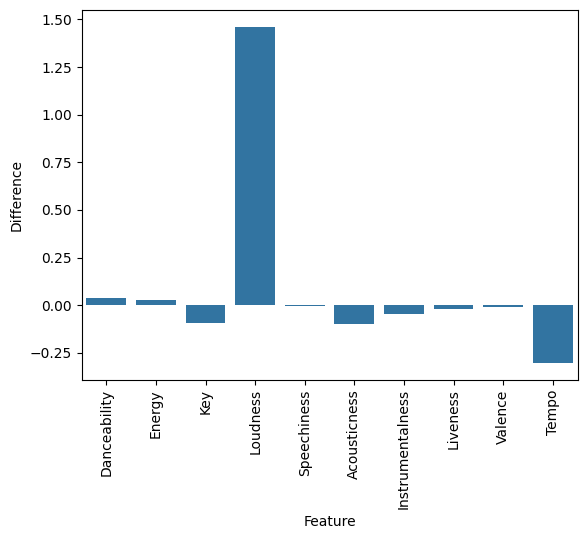

In [ ]:
sns.barplot(x='Feature', y='Difference', data=avg_df)
plt.xticks(rotation=90)
#loudness (decibles) and tempo (beats per min) are on diff scales than all others (rated on scale 0-1)